In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import sys
import os

sys.path.append(os.path.join(os.path.abspath('.'),'../../plankton'))

In [2]:
import plankton as pl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data_folder='data/'

umpp=0.152

coordinates = pd.read_csv(os.path.join(data_folder,'./coordinates.csv'))

# dapi_image = plt.imread(os.path.join(data_folder,'156KS_FITC_backround.tif')).sum(-1)
# dapi_image -=dapi_image.min()
# dapi_image = 1-(dapi_image/dapi_image.max())**0.7

# bg_cells= np.load('./data/leftCA1/label_image.coo.npz')
# cell_mask = np.zeros(bg_cells['shape'])
# cell_mask[bg_cells['row'],bg_cells['col']]=bg_cells['data']

In [6]:
sdata = pl.SpatialData(genes=coordinates.genes,
                       x_coordinates=coordinates.X,
                       y_coordinates=coordinates.Y)[::20] 

In [7]:
len(sdata)

90130

(<matplotlib.collections.PathCollection at 0x7f2c8d9ca7c0>, None, None)

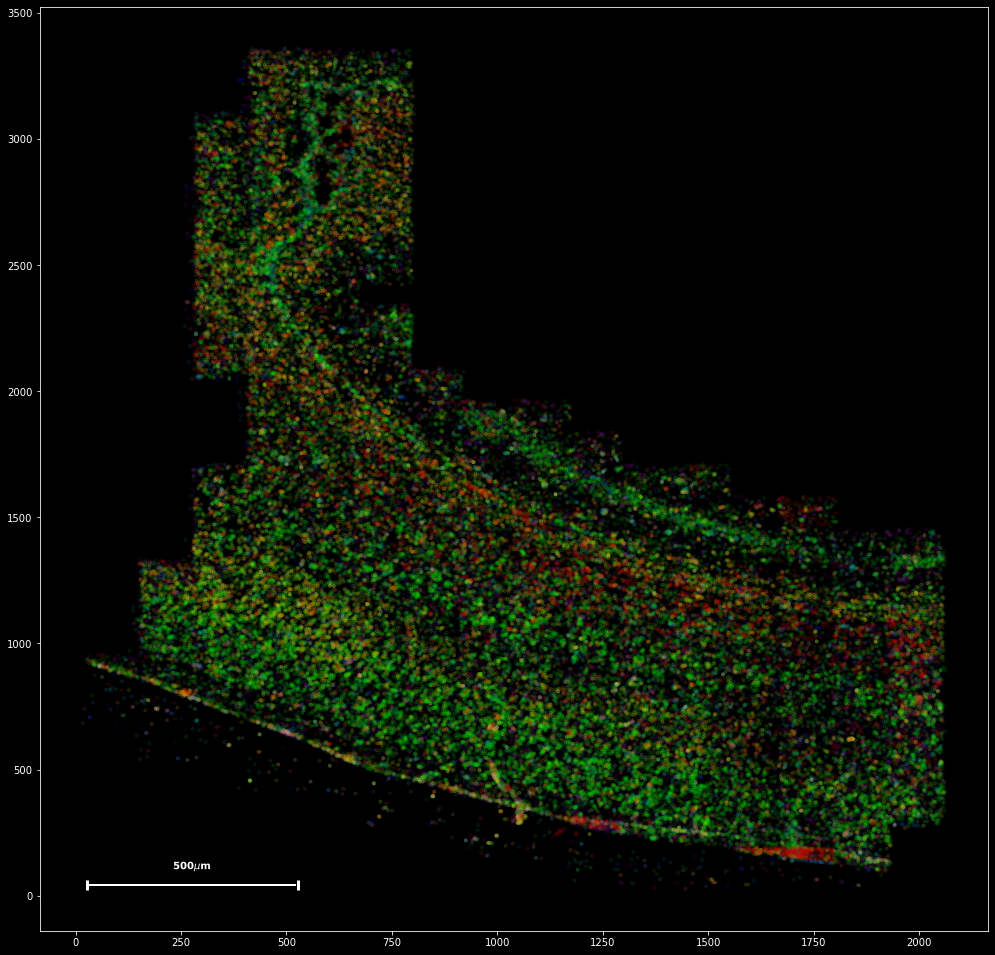

In [8]:
plt.figure(figsize=(17,17))
sdata.scatter(alpha=0.1,marker='.')

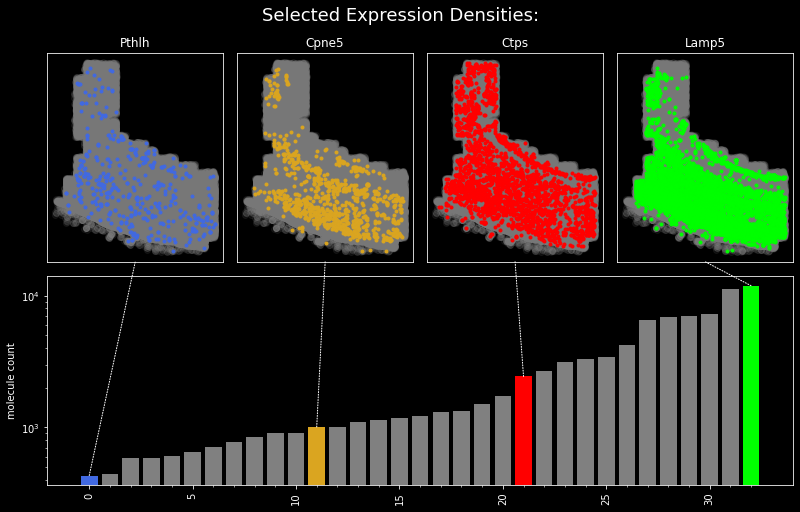

In [9]:
sdata.plot_overview()

In [12]:
knn_neighbors=250
bandwidth=80
n_neighbors=50
metric='euclidean'
min_dist=0.5
random_state=42
zero_weight=5

_=sdata.graph.update_knn(n_neighbors=knn_neighbors)

sdata.graph.run_umap(bandwidth=bandwidth,n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state,zero_weight=zero_weight)



<IPython.core.display.Javascript object>


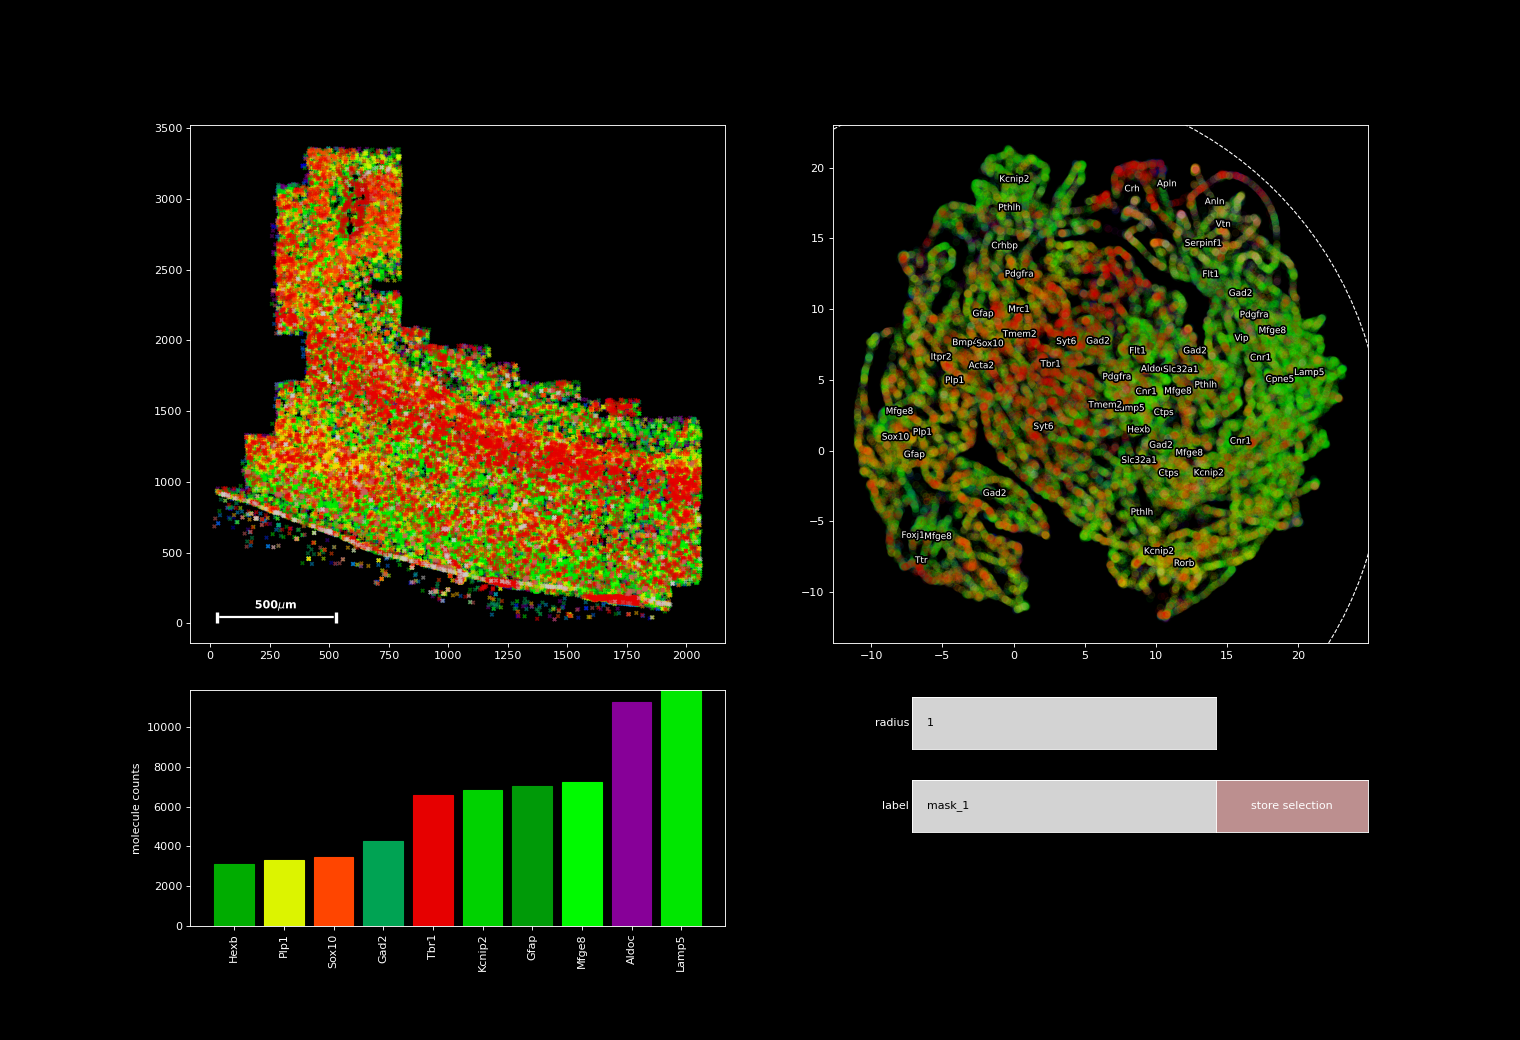

In [13]:
%matplotlib notebook

plt.style.use('dark_background')

plt.figure(figsize=(19,13))
sdata.graph.umap_interactive(color_prop='genes',umap_kwargs={'alpha':0.05,'thlds_text':[0.8,0.03,200],'text_distance':1.5,'legend':False,'text_kwargs':{'fontsize':8},'text_prop':'genes','cmap':'nipy_spectral'})

In [11]:
sdata['act']=(sdata.act_1|sdata.act_2|sdata.act_3|sdata.act_4)

In [4]:
# sdata.save('qian_segmemnts.pl')

Index(['g', 'x', 'y', 'gene_id', 'act_1', 'act_2', 'act_3', 'act_4', 'act',
       'inh_1', 'inh_2'],
      dtype='object')
